### Problem Statement:

Sales management has gained importance to meet increasing competition and the need
for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

Do ETL : Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month wise , year wise , yearly_month wise
Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings.



#### Dataset
https://drive.google.com/drive/folders/1FkmFVL8wlJmQWP1z52TD8PlhOJhitTyI?usp=s


#### Techniques which i used-      
 - Removing unwanted attributes.
 -  Visualizing relation of independent variables with each other and output variables.
 - Checking and changing distribution of continuous values. 
  - Removing outliers
  - Cleaning data and imputingifnullvaluesare present.
  - Transforming data to yield the desired result



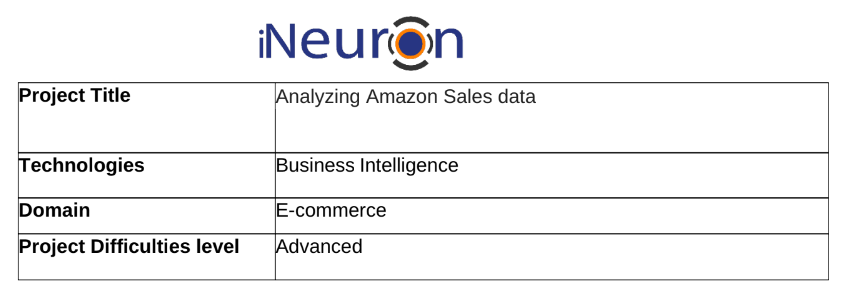

### Importing the libraries

In [46]:
import numpy as np # numerical analysis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings
warnings.filterwarnings(action="ignore")

### Importing the data

In [47]:
df = pd.read_csv(r"C:\Users\apeks\Downloads\SALESDATA.xlsx - AmazonFoodCategory_1 Dataset.csv")
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,4/30/2017,-237.91,2017/04/30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,4/30/2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,7/14/2017,368.79,2017/07/14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,7/14/2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,10/17/2017,109.73,2017/10/17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,10/16/2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,6/3/2017,-211.75,2017/06/03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,6/3/2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,5/27/2017,96627.94,2017/05/27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,5/28/2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [48]:
### Checking the shape
df.shape

(65282, 20)

In [49]:
### Checking basic info
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  int64  
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  int64  
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  int64  
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  int64  
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [51]:
df.nunique()

CustKey                               615
DateKey                               559
Discount Amount                     17773
Invoice Date                          559
Invoice Number                      24681
Item Class                              2
Item Number                           983
Item                                  657
Line Number                           397
List Price                           1062
Order Number                        17798
Promised Delivery Date                592
Sales Amount                        17896
Sales Amount Based on List Price     4060
Sales Cost Amount                    5513
Sales Margin Amount                 21296
Sales Price                         14789
Sales Quantity                        281
Sales Rep                              64
U/M                                     3
dtype: int64

In [52]:
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [53]:
#checking null values
df.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [54]:
#Cheking percentage of missing values
round(df.isnull().sum()/ len(df) *100,2)

CustKey                              0.00
DateKey                              0.00
Discount Amount                      0.00
Invoice Date                         0.00
Invoice Number                       0.00
Item Class                          12.70
Item Number                          0.06
Item                                 0.00
Line Number                          0.00
List Price                           0.00
Order Number                         0.00
Promised Delivery Date               0.00
Sales Amount                         0.00
Sales Amount Based on List Price     0.00
Sales Cost Amount                    0.00
Sales Margin Amount                  0.00
Sales Price                          0.00
Sales Quantity                       0.00
Sales Rep                            0.00
U/M                                  0.00
dtype: float64

In [55]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,4/30/2017,-237.91,2017/04/30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,4/30/2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,7/14/2017,368.79,2017/07/14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,7/14/2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,10/17/2017,109.73,2017/10/17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,10/16/2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,6/3/2017,-211.75,2017/06/03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,6/3/2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,5/27/2017,96627.94,2017/05/27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,5/28/2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [56]:
sales_df = df.copy()

In [10]:
# Creating DataFrame only with necessary columns.
sales_df2 = sales_df[['CustKey', 'Item','Invoice Date',
                        'Sales Quantity','Sales Amount','Sales Amount Based on List Price','Discount Amount',
                        'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price','Sales Price']]

In [11]:
### Checking null values
sales_df2.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     2
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         1
dtype: int64

In [12]:
#removed the null values from the columns
sales_df2.dropna(subset=['Discount Amount','Sales Price'],axis=0,inplace=True)

In [13]:
### Checking null values again
sales_df2.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

In [14]:
# creating Year, Month, Quarter, Day Columns in sales_data
sales_df2['Invoice Date'] = pd.to_datetime(sales_df2['Invoice Date'])

sales_df2['Invoice_Year'] = sales_df2['Invoice Date'].dt.year
sales_df2['Invoice_Month'] = sales_df2['Invoice Date'].dt.month
sales_df2['Invoice_Quarter']= sales_df2['Invoice Date'].dt.quarter
sales_df2['Invoice_Day']= sales_df2['Invoice Date'].dt.day

In [15]:
sales_df2.head()

,CustKey,Item,Invoice Date,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_Day
0,10000481,Urban Large Eggs,2017-04-30,1,237.91,0.00,-237.91,237.91,0.0,184,EA,0.00,237.910000,2017,4,2,30
1,10002220,Moms Sliced Turkey,2017-07-14,1,456.17,824.96,368.79,456.17,0.0,127,EA,824.96,456.170000,2017,7,3,14
2,10002220,Cutting Edge Foot-Long Hot Dogs,2017-10-17,1,438.93,548.66,109.73,438.93,0.0,127,EA,548.66,438.930000,2017,10,4,17
3,10002489,Kiwi Lox,2017-06-03,1,211.75,0.00,-211.75,211.75,0.0,160,EA,0.00,211.750000,2017,6,2,3
4,10004516,High Top Sweet Onion,2017-05-27,455,89248.66,185876.60,96627.94,89248.66,0.0,124,SE,408.52,196.150901,2017,5,2,27


In [16]:
sales_df2.dtypes

CustKey                                      int64
Item                                        object
Invoice Date                        datetime64[ns]
Sales Quantity                               int64
Sales Amount                               float64
Sales Amount Based on List Price           float64
Discount Amount                            float64
Sales Margin Amount                        float64
Sales Cost Amount                          float64
Sales Rep                                    int64
U/M                                         object
List Price                                 float64
Sales Price                                float64
Invoice_Year                                 int64
Invoice_Month                                int64
Invoice_Quarter                              int64
Invoice_Day                                  int64
dtype: object

In [57]:
### Seperating columns in continuous and categorical for univariate analysis
cont = ['Sales Amount',  'Discount Amount', 'Sales Margin Amount',
      'Sales Cost Amount', 'Sales Rep', 'List Price','Sales Price']
cat = ['Item', 'U/M']

### Univariate Analysis for Categorical columns

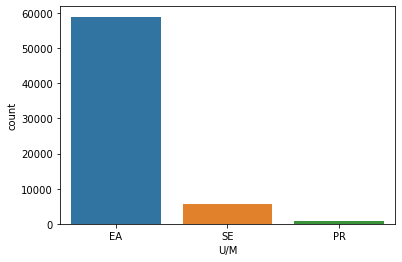

In [60]:
sns.countplot(sales_df2['U/M'])
plt.show()

Boxplot of Sales Amount


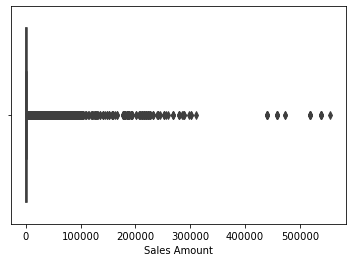

Boxplot of Discount Amount


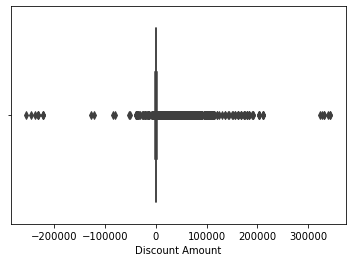

Boxplot of Sales Margin Amount


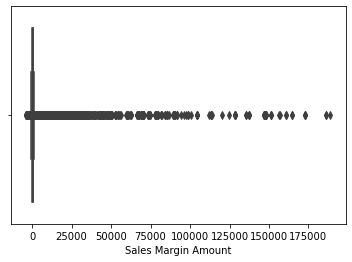

Boxplot of Sales Cost Amount


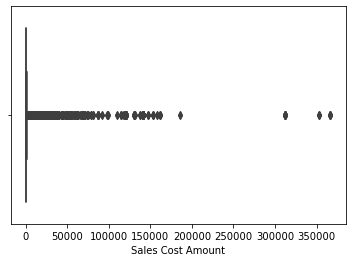

Boxplot of Sales Rep


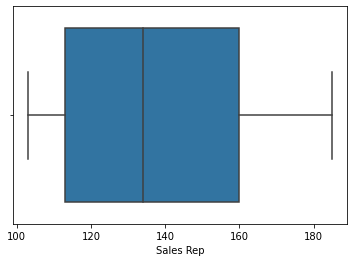

Boxplot of List Price


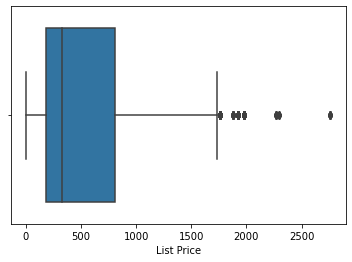

Boxplot of Sales Price


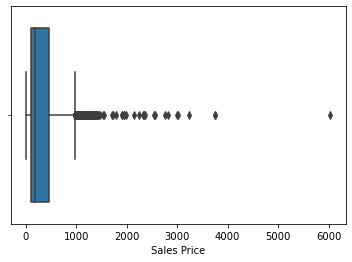

In [61]:
for i in cont:
    print("Boxplot of",i)
    sns.boxplot(sales_df2[i])
    plt.show()

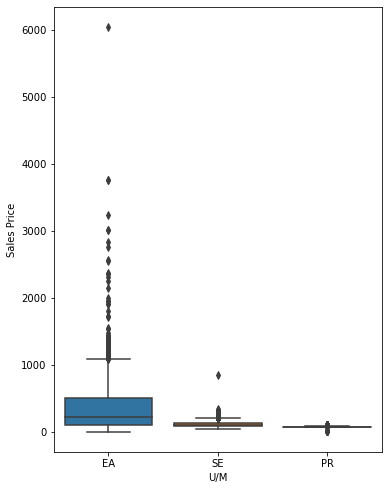

In [18]:
plt.figure(figsize=(20, 18))

plt.subplot(2,3,2)
sns.boxplot(x = 'U/M', y = 'Sales Price', data = sales_df2)
plt.show()

#### Sales cost amount by year

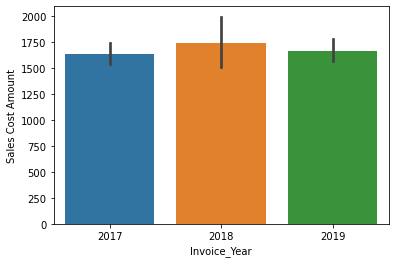

In [19]:
sns.barplot(y = 'Sales Cost Amount', x= 'Invoice_Year', data = sales_df2)
plt.show()

#### Discount by Year

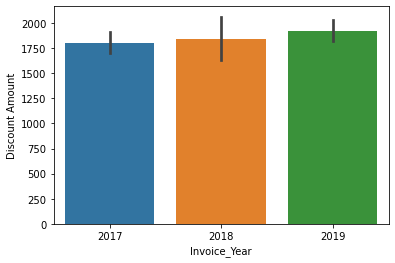

In [20]:
sns.barplot(y = 'Discount Amount', x= 'Invoice_Year', data = sales_df2)
plt.show()

#### Countplot For Month

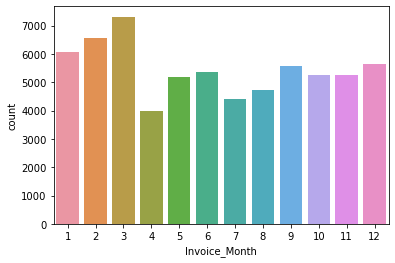

In [21]:
sns.countplot(sales_df2['Invoice_Month'])
plt.show()

### Yearly Sales

,Invoice_Year,Sales Amount
0,2017,87457304.54
1,2018,20817471.00
2,2019,77906591.65


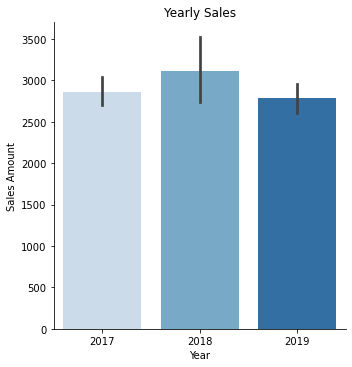

In [22]:
Yearly_Sales = sales_df2.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = sales_df2, palette='Blues',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales[['Invoice_Year', 'Sales Amount']]

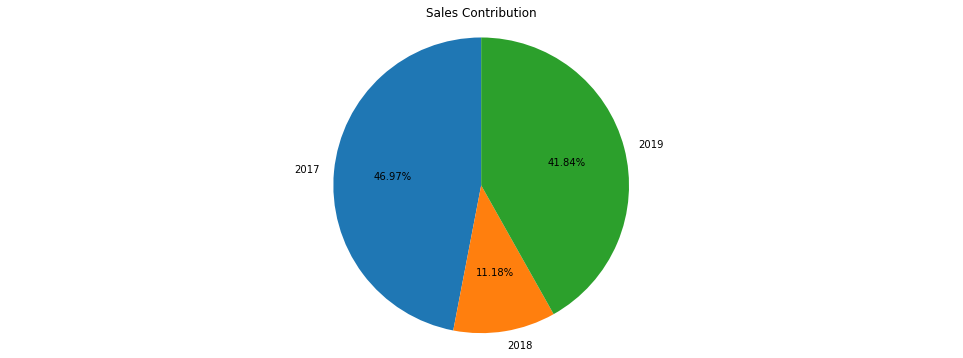

In [23]:
#Plotting Piechart to know Sales Share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Sales Amount',labels='Invoice_Year',data=Yearly_Sales,autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.show()

Observations: From 2017-19 Highest Sales Amount 2017>2019>2018 

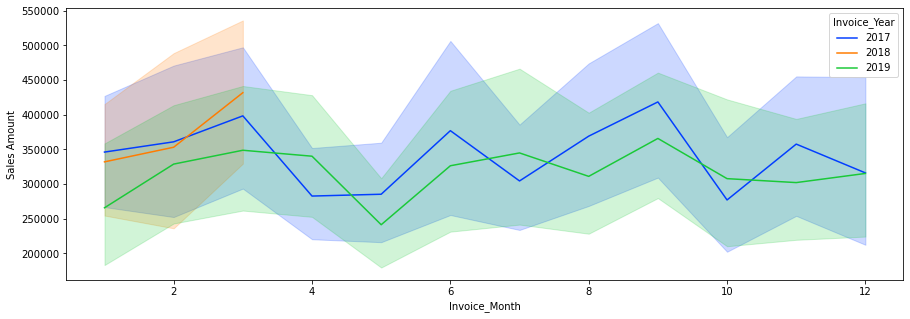

In [24]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Invoice_Month',y ='Sales Amount',
             data= sales_df2.groupby(['Invoice_Day','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')
plt.show()

Obseravtions: The Sales decreased continuously & then it started to increase from 2018 to 2019.

### MonthWise sales

,Invoice_Month,Sales Amount
0,1,19471739.54
1,2,20497349.91
2,3,21714172.68
3,4,12112134.49
4,5,11053298.15
5,6,15847396.38
6,7,13287585.39
7,8,14590209.54
8,9,16466268.87
9,10,12829983.51


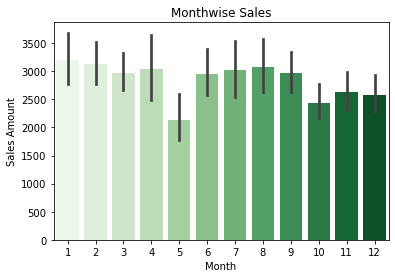

In [25]:
Yearly_Sales = sales_df2.groupby('Invoice_Month').sum().reset_index()
sns.barplot(y = 'Sales Amount', x = 'Invoice_Month', data = sales_df2, palette='Greens')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Monthwise Sales')
Yearly_Sales[['Invoice_Month', 'Sales Amount']]

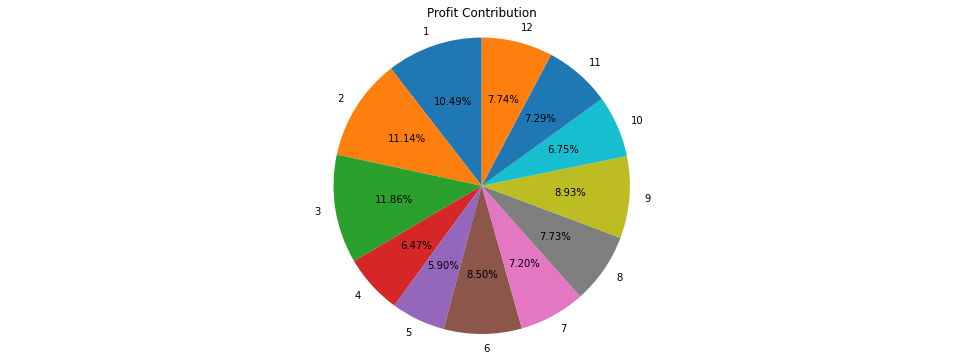

In [26]:
#Plotting Piechart to know Profit Share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Sales Margin Amount',labels='Invoice_Month',data=Yearly_Sales,autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Profit Contribution')
plt.show()

### Yearly-MonthWise Records

In [27]:
Yearly_Monthwise_Sales = sales_df2.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
Yearly_Monthwise_Sales.describe()

,Invoice_Year,Invoice_Month,CustKey,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price,Invoice_Quarter,Invoice_Day
count,27.000000,27.000000,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,2018.000000,6.000000,2.422058e+10,109007.222222,6.895606e+06,1.138197e+07,4.486368e+06,2.879604e+06,4.016002e+06,332258.740741,1.244452e+06,685915.941545,5837.111111,39061.370370
std,0.960769,3.626823,4.062794e+09,18095.115079,1.143812e+06,2.220965e+06,1.231585e+06,5.152791e+05,6.506092e+05,55396.534583,2.116445e+05,117490.201952,3360.496327,7380.842834
min,2017.000000,1.000000,9.666740e+09,55192.000000,3.187481e+06,4.900167e+06,1.712686e+06,1.290189e+06,1.897292e+06,130314.000000,5.042254e+05,270807.438237,965.000000,20678.000000
25%,2017.000000,3.000000,2.217274e+10,98729.000000,6.461181e+06,1.077866e+07,4.024413e+06,2.622197e+06,3.688586e+06,306638.500000,1.143268e+06,620357.646120,2599.500000,34253.000000
50%,2018.000000,6.000000,2.486229e+10,111172.000000,6.895858e+06,1.152212e+07,4.797025e+06,2.882060e+06,4.092856e+06,339909.000000,1.259842e+06,696506.820154,5476.000000,40544.000000
75%,2019.000000,9.000000,2.676276e+10,119393.000000,7.600667e+06,1.278649e+07,5.277200e+06,3.134162e+06,4.370919e+06,366618.000000,1.365313e+06,753245.775603,8332.500000,44712.500000
max,2019.000000,12.000000,2.955487e+10,138019.000000,8.786342e+06,1.472000e+07,6.112159e+06,3.810222e+06,5.041842e+06,404709.000000,1.558636e+06,876228.847968,11576.000000,49487.000000


In [28]:
Yearly_Monthwise_Sales[['Sales Amount', 'Sales Margin Amount']].describe()

,Sales Amount,Sales Margin Amount
count,2.700000e+01,2.700000e+01
mean,6.895606e+06,2.879604e+06
std,1.143812e+06,5.152791e+05
min,3.187481e+06,1.290189e+06
25%,6.461181e+06,2.622197e+06
50%,6.895858e+06,2.882060e+06
75%,7.600667e+06,3.134162e+06
max,8.786342e+06,3.810222e+06


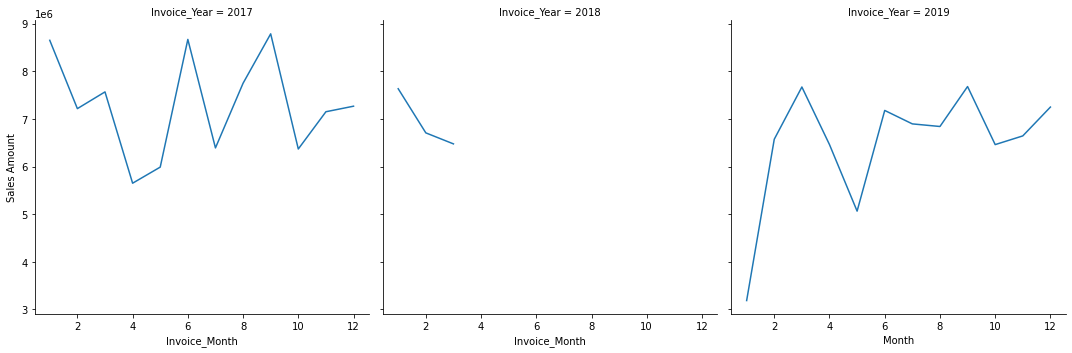

In [29]:
sns.relplot(x ='Invoice_Month',y = 'Sales Amount', data=Yearly_Monthwise_Sales,
            kind = 'line', col = 'Invoice_Year')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

<AxesSubplot:xlabel='Sales Amount', ylabel='Count'>

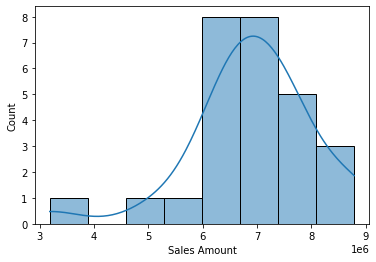

In [30]:
sns.histplot(Yearly_Monthwise_Sales['Sales Amount'], kde = True)

### Monthly Sales

In [31]:
Monthly_Sales = sales_df2.groupby(['Invoice_Year','Invoice_Month', 'Invoice_Day']).sum().reset_index()
Monthly_Sales.describe()

,Invoice_Year,Invoice_Month,Invoice_Day,CustKey,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price,Invoice_Quarter
count,559.000000,559.000000,559.000000,5.590000e+02,559.000000,5.590000e+02,5.590000e+02,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2017.978533,6.162791,15.788909,1.169867e+09,5265.107335,3.330615e+05,5.497554e+05,2.166940e+05,139086.442308,193975.037460,16048.275492,60107.716035,33130.108089,281.935599
std,0.948251,3.575150,8.749510,5.838214e+08,4781.445858,2.302024e+05,3.889088e+05,1.820144e+05,97025.174636,136009.114595,8052.820326,31837.127941,17179.276121,213.036494
min,2017.000000,1.000000,1.000000,3.005291e+07,4.000000,5.433650e+03,0.000000e+00,-2.555238e+05,2349.360000,0.000000,345.000000,0.000000,1063.117667,6.000000
25%,2017.000000,3.000000,8.000000,7.560818e+08,2106.500000,1.572531e+05,2.560595e+05,8.888978e+04,62655.095000,92237.325000,10063.000000,40370.544400,22084.687514,124.000000
50%,2018.000000,6.000000,16.000000,1.111151e+09,3118.000000,2.688299e+05,4.487250e+05,1.630951e+05,113446.860000,150428.990000,14666.000000,54665.030000,30440.440019,216.000000
75%,2019.000000,9.000000,23.000000,1.452604e+09,6577.000000,4.696801e+05,7.178838e+05,2.891977e+05,195474.320000,267013.720000,19652.500000,72573.307400,41211.201040,372.000000
max,2019.000000,12.000000,31.000000,4.609153e+09,23710.000000,1.379283e+06,2.408920e+06,1.029636e+06,619085.330000,760197.860000,55866.000000,231196.720800,128415.923388,1341.000000


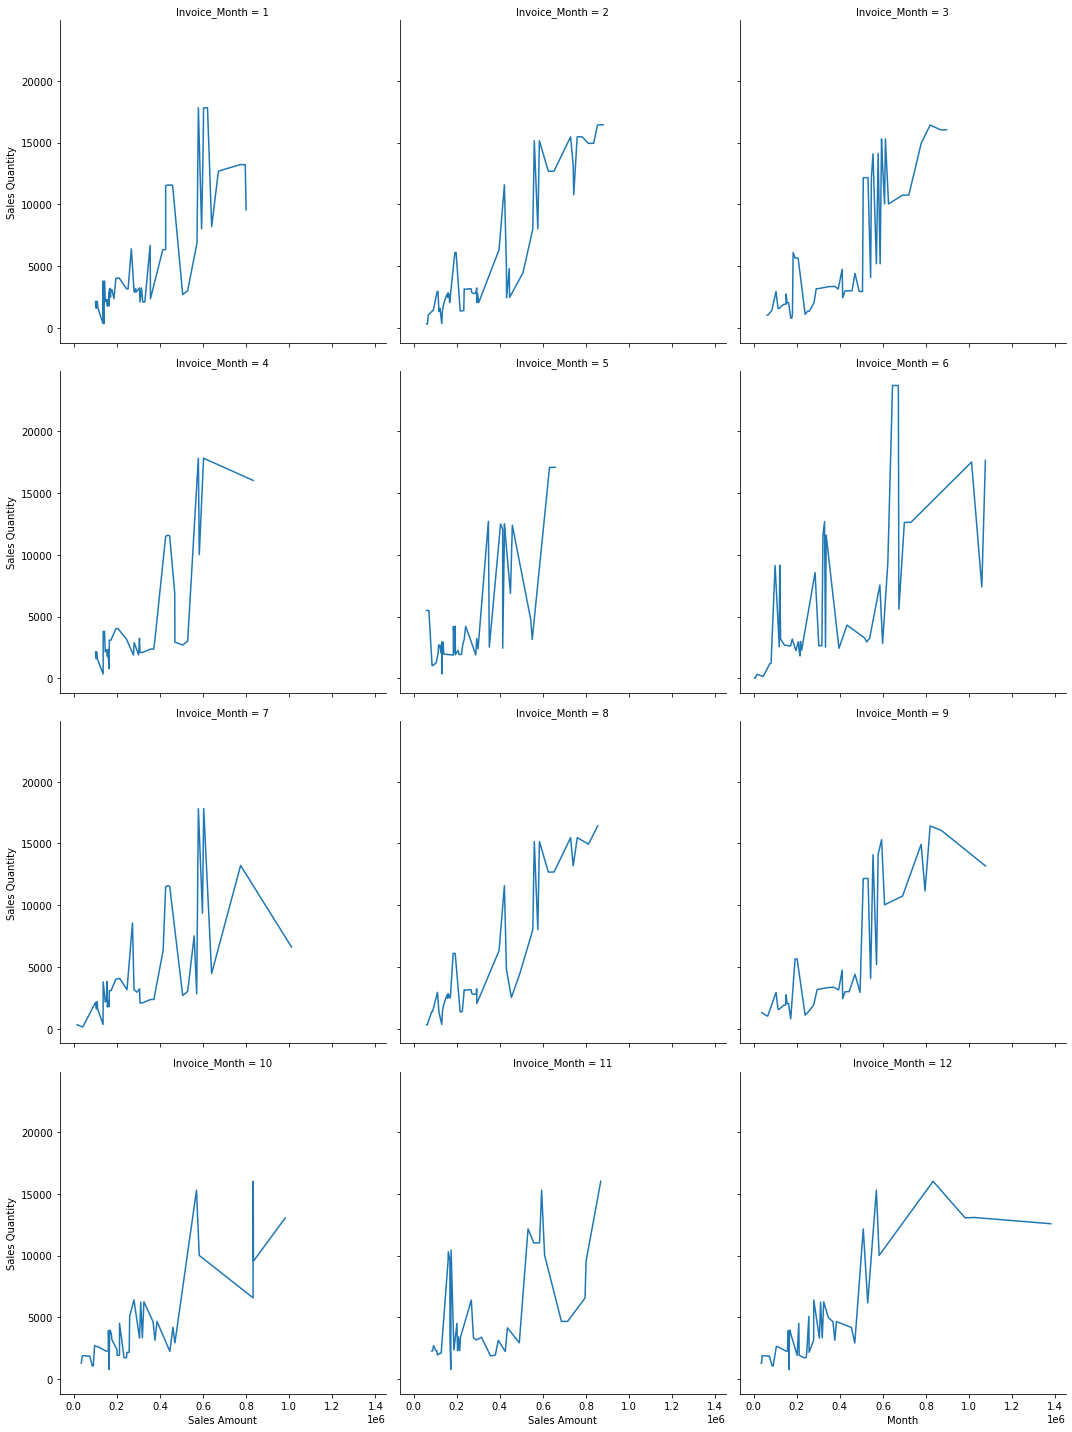

In [32]:
sns.relplot(x ='Sales Amount',y = 'Sales Quantity', data=Monthly_Sales,
            kind = 'line', col = 'Invoice_Month', col_wrap=3)
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

### Profit Records

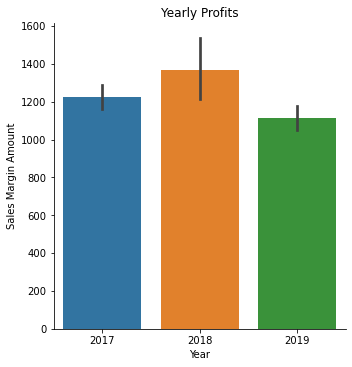

In [33]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = sales_df2,kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
plt.show()

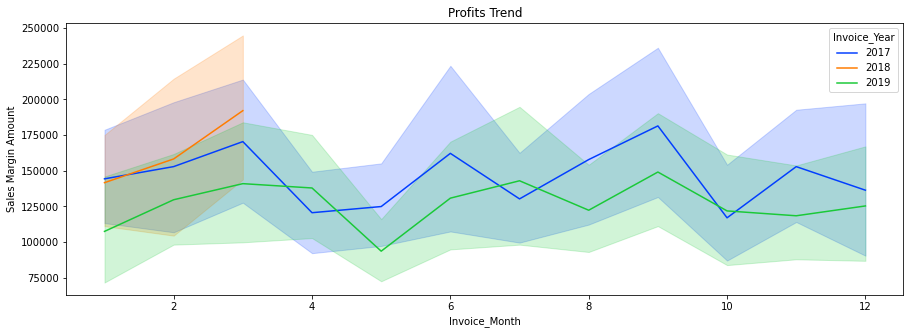

In [34]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Margin Amount', x = 'Invoice_Month',
             data= sales_df2.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')
plt.title('Profits Trend')
plt.show()

In [35]:
sales_df2.corr(method='pearson')

,CustKey,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_Day
CustKey,1.000000,0.031856,0.019042,0.004446,-0.021772,0.018221,0.019042,-0.160201,-0.007851,-0.007470,-0.076369,0.006910,0.007387,0.001332
Sales Quantity,0.031856,1.000000,0.820925,0.638784,0.085401,0.722243,0.859719,0.048594,-0.095847,-0.091779,0.000730,-0.008851,-0.008642,-0.002618
Sales Amount,0.019042,0.820925,1.000000,0.918649,0.425852,0.973165,0.989992,0.039115,-0.009787,-0.010740,-0.002425,-0.010677,-0.010600,-0.003146
Sales Amount Based on List Price,0.004446,0.638784,0.918649,1.000000,0.748668,0.914734,0.896738,0.029239,0.025658,0.012609,0.000846,-0.004483,-0.005234,-0.002327
Discount Amount,-0.021772,0.085401,0.425852,0.748668,1.000000,0.461916,0.392464,0.001327,0.075184,0.046898,0.006006,0.007651,0.005799,-0.000050
Sales Margin Amount,0.018221,0.722243,0.973165,0.914734,0.461916,1.000000,0.930953,0.041659,-0.002148,-0.000855,-0.008829,-0.013008,-0.013129,-0.003453
Sales Cost Amount,0.019042,0.859719,0.989992,0.896738,0.392464,0.930953,1.000000,0.036520,-0.014213,-0.016517,0.001567,-0.008965,-0.008768,-0.002874
Sales Rep,-0.160201,0.048594,0.039115,0.029239,0.001327,0.041659,0.036520,1.000000,0.002807,0.032465,0.002452,-0.004751,-0.006480,0.019024
List Price,-0.007851,-0.095847,-0.009787,0.025658,0.075184,-0.002148,-0.014213,0.002807,1.000000,0.953445,0.012026,0.004080,0.005225,0.000788
Sales Price,-0.007470,-0.091779,-0.010740,0.012609,0.046898,-0.000855,-0.016517,0.032465,0.953445,1.000000,-0.016114,-0.007567,-0.006536,0.002295


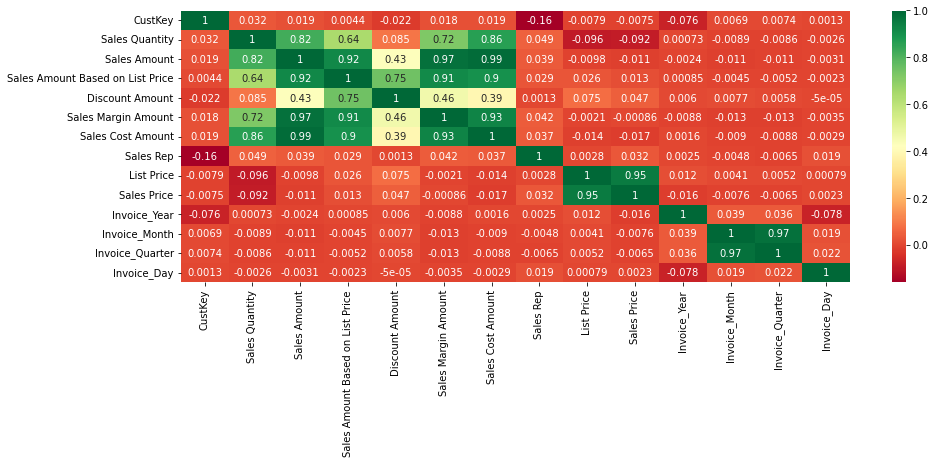

In [36]:
plt.figure(figsize = (15,5))
sns.heatmap(sales_df2.corr(),cmap='RdYlGn', annot=True)
plt.show()

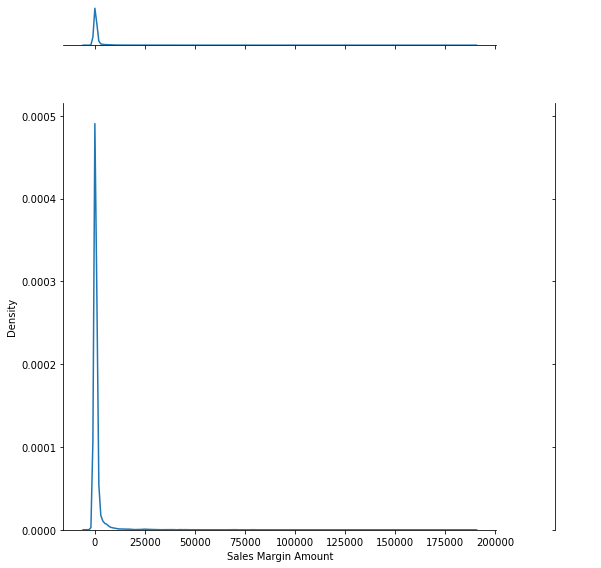

In [75]:
sns.jointplot(x='Sales Margin Amount',data=sales_df2,height=8,ratio=5,kind='kde',space=1.5)
plt.show()